# Tarea 1 Modulo 1 - Analisis de Datos 2022-1

---

## 1 Una imagen es un arreglo de datos

In [1]:
# !pip install matplotlib
# !pip install opencv-python
# !pip install scikit-image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage import io, color
import pandas as pd
# %matplotlib inline

In [3]:
img_file = "data/playa_blanca.jpg"

In [4]:
img = cv.imread(img_file)
print("The shape of image is =",np.shape(img))

The shape of image is = (480, 720, 3)


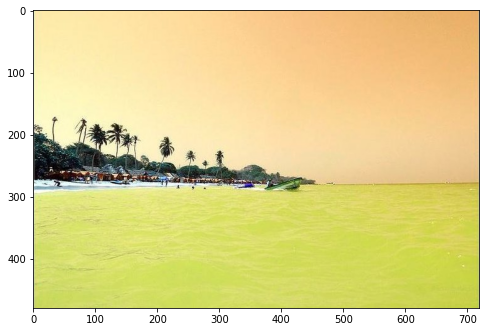

In [5]:
plt.figure(figsize=(8,9))
plt.imshow(img)
plt.show()

In [6]:
## ajuste a RGB
img2=cv.cvtColor(img,cv.COLOR_BGR2RGB)

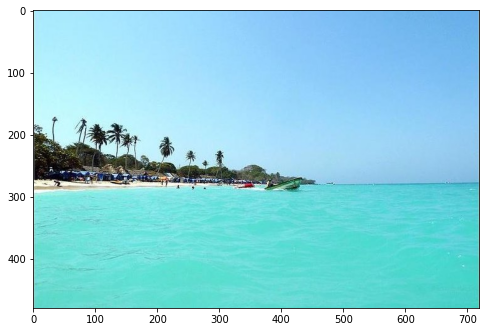

In [7]:
## corroborar cambio de color
plt.figure(figsize=(8,9))
plt.imshow(img2)
plt.show()

## 1.1 Construya un arreglo de estas componentes en un solo (otro)arreglo de datos.

In [8]:
## separar por colores
r,g,b=cv.split(img2)
print(f"Rojo(r)={r.shape}, Verde(g)={g.shape}, Azul(b)={b.shape}")

Rojo(r)=(480, 720), Verde(g)=(480, 720), Azul(b)=(480, 720)


## 1.2 Calcule para cada arreglo las medidas de tendencia central, las medidas de dispersion y las medidas de simetrıa correspondientes, tambien las medida de variabilidad o coeficiente de variabilidad o coeficiente de Pearson

calculo del **promedio** por RGB

In [9]:
np.mean(r), np.mean(g), np.mean(b)

(129.43274305555556, 209.6073871527778, 224.52356481481482)

calculo del **mediana** por RGB

In [10]:
np.median(r), np.median(g), np.median(b)

(127.0, 218.0, 236.0)

calculo de **Desviacion standar** por RGB

In [11]:
np.std(r), np.std(g), np.std(b)

(40.21936091868103, 38.882972734782804, 44.10521688536469)

calculo de **Percentil 50** por RGB

In [12]:
np.mean(r) - np.median(r), np.mean(g) - np.median(g), np.mean(b) - np.median(b)

(2.4327430555555623, -8.39261284722221, -11.476435185185181)

#### medidas de simetria

In [13]:
np.mean(r)-np.median(r) , np.mean(g)-np.median(g) , np.mean(b)-np.median(b)

(2.4327430555555623, -8.39261284722221, -11.476435185185181)

In [14]:
(np.mean(r)-np.median(r))/np.std(r) , (np.mean(g)-np.median(g))/np.std(g) , (np.mean(b)-np.median(b))/np.std(b)

(0.060486865031850995, -0.2158428807505911, -0.26020584401645636)

In [15]:
3*(np.mean(r) - np.median(r))/np.std(r), 3*(np.mean(g) - np.median(g))/np.std(g), 3*(np.mean(b) - np.median(b))/np.std(b)

(0.18146059509555298, -0.6475286422517733, -0.780617532049369)

## 1.3 Haga un histograma de cada componente.

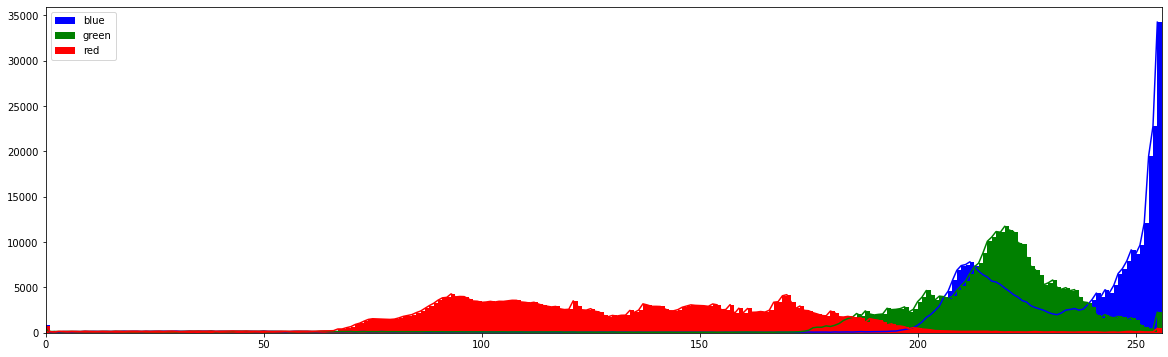

In [16]:
## plot hist R,G,B
plt.figure(figsize=(20,6))
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim(0,256)
plt.hist(b.ravel(),bins=256,range=(0,256),color='b',label='blue')
plt.hist(g.ravel(),bins=256,range=(0,256),color='g',label='green')
plt.hist(r.ravel(),bins=256,range=(0,256),color='r',label='red')
plt.legend()
plt.show()

## 1.4 Ahora suponga que la escala de cada color, la cual es un numero que va en el intervalo [0, 255] usted la divide en [”Claro”,”Medio”,”Oscuro”], bajo un criterio que usted elabore. Construya un nuevo arreglo con estos datos.


In [17]:
## dividir en partes iguales sin decimales
list(range(0,255+1,int((255+1)/3)))

[0, 85, 170, 255]

In [18]:
def categorizar_color(c):
    if c<85:
        cat = 'Claro'
    elif (c>=85) & (c<170):
        cat = 'Medio'
    else:
        cat = 'Oscuro'
    return cat

In [19]:
b_cat = [categorizar_color(c) for c in b.ravel()]
g_cat = [categorizar_color(c) for c in g.ravel()]
r_cat = [categorizar_color(c) for c in r.ravel()]

In [20]:

print("Ejmeplo B:", ", ".join(b_cat[:10]))
print("Ejmeplo G:", ", ".join(g_cat[:10]))
print("Ejmeplo R:", ", ".join(r_cat[:10]))

Ejmeplo B: Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro
Ejmeplo G: Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro, Oscuro
Ejmeplo R: Oscuro, Oscuro, Oscuro, Oscuro, Medio, Oscuro, Oscuro, Oscuro, Oscuro, Medio


In [21]:
# Nuevo arreglo
df1 = pd.DataFrame({'Blue': b_cat, 'Green': g_cat, 'Red': r_cat})
df1.head()

,Blue,Green,Red
0,Oscuro,Oscuro,Oscuro
1,Oscuro,Oscuro,Oscuro
2,Oscuro,Oscuro,Oscuro
3,Oscuro,Oscuro,Oscuro
4,Oscuro,Oscuro,Medio


In [22]:
df2 = df1.unstack().reset_index()[['level_0',0]]
df2.columns = ['color','categoria']
df2 = pd.pivot_table(df2, index='color', columns='categoria', aggfunc='size', fill_value=0)
df2.columns = list(df2.columns)
df2

,Claro,Medio,Oscuro
color,,,
Blue,13209,5954,326437
Green,12426,6712,326462
Red,35059,249168,61373


## 1.5 Ahora haga un grafico de torta y un grafico de barras para visualizar el ultimo arreglo que hizo.

array([<AxesSubplot:ylabel='Blue'>, <AxesSubplot:ylabel='Green'>,
       <AxesSubplot:ylabel='Red'>], dtype=object)

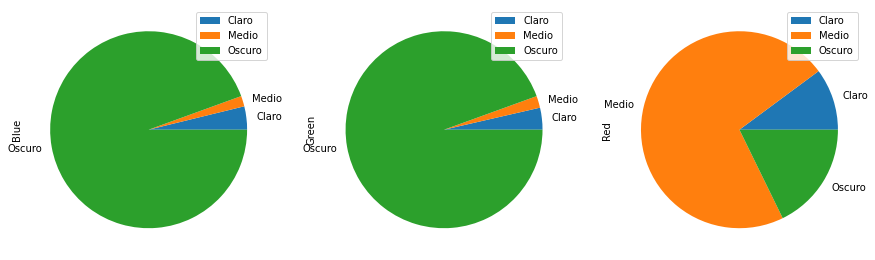

In [23]:
df2.T.plot.pie(subplots=True, figsize=(15,15))

<AxesSubplot:xlabel='color'>

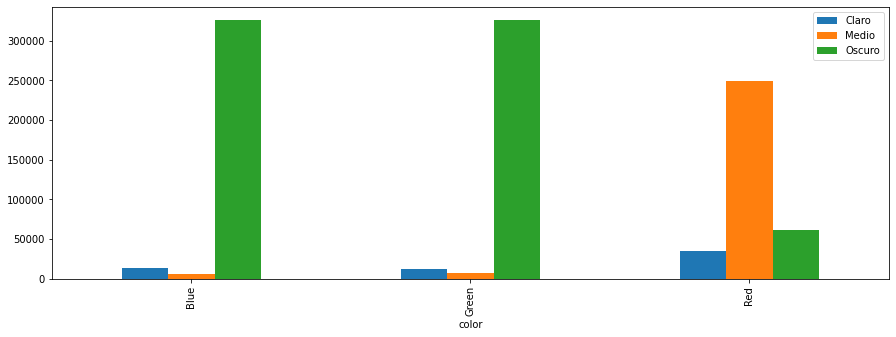

In [24]:
df2.plot.bar(figsize=(15,5))

### 6. Haga un analisis general de la situacion sin dejar de menocionar cada calculo que ha hecho

* Se realizo la carga y la transformación de la imagen a un arreglo, despues a este arreglo se le calcularon las metricas de tendencia central asi como medidas de dispersion y medidas de simetria.
* Se realiza la distribucion de los colores y componentes, ademas de realizar la recategorizacion de los colores por Claro, Medio y Oscuro.
* Realizacion de reestructuración de los componentes de la imagen en un nuevo arreglo
* Adicionalmente se realizo las graficas de distribucion de las nuevas categorias por los colores